In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [35]:
# Load the dataset
url = "https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv"
data = pd.read_csv(url)

In [36]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [38]:
# Handle missing values
data.dropna(subset=["RainTomorrow"], inplace=True)
data.fillna(method='ffill', inplace=True)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8186 entries, 0 to 8423
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8186 non-null   object 
 1   Location       8186 non-null   object 
 2   MinTemp        8186 non-null   float64
 3   MaxTemp        8186 non-null   float64
 4   Rainfall       8186 non-null   float64
 5   Evaporation    7288 non-null   float64
 6   Sunshine       7288 non-null   float64
 7   WindGustDir    8186 non-null   object 
 8   WindGustSpeed  8186 non-null   float64
 9   WindDir9am     8186 non-null   object 
 10  WindDir3pm     8186 non-null   object 
 11  WindSpeed9am   8186 non-null   float64
 12  WindSpeed3pm   8186 non-null   float64
 13  Humidity9am    8186 non-null   float64
 14  Humidity3pm    8186 non-null   float64
 15  Pressure9am    8186 non-null   float64
 16  Pressure3pm    8186 non-null   float64
 17  Cloud9am       8186 non-null   float64
 18  Cloud3pm

In [40]:
# Check for missing values in target variable
print("Missing values in RainTomorrow:", data['RainTomorrow'].isnull().sum())

Missing values in RainTomorrow: 0


In [41]:
# Handle missing values in specified columns using forward-fill
data['Evaporation'].fillna(method='ffill', inplace=True)
data['Sunshine'].fillna(method='ffill', inplace=True)
data['Cloud3pm'].fillna(method='ffill', inplace=True)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8186 entries, 0 to 8423
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8186 non-null   object 
 1   Location       8186 non-null   object 
 2   MinTemp        8186 non-null   float64
 3   MaxTemp        8186 non-null   float64
 4   Rainfall       8186 non-null   float64
 5   Evaporation    7288 non-null   float64
 6   Sunshine       7288 non-null   float64
 7   WindGustDir    8186 non-null   object 
 8   WindGustSpeed  8186 non-null   float64
 9   WindDir9am     8186 non-null   object 
 10  WindDir3pm     8186 non-null   object 
 11  WindSpeed9am   8186 non-null   float64
 12  WindSpeed3pm   8186 non-null   float64
 13  Humidity9am    8186 non-null   float64
 14  Humidity3pm    8186 non-null   float64
 15  Pressure9am    8186 non-null   float64
 16  Pressure3pm    8186 non-null   float64
 17  Cloud9am       8186 non-null   float64
 18  Cloud3pm

In [43]:
# Verify that missing values are handled
print(data.isnull().sum())

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation      898
Sunshine         898
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           2
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
dtype: int64


In [44]:
# Handle missing values in specified columns using the mean
columns_with_missing_values = ['Evaporation', 'Sunshine', 'Cloud3pm']

for col in columns_with_missing_values:
    mean_value = data[col].mean()
    data[col].fillna(mean_value, inplace=True)

# Verify that missing values are handled
print(data.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [47]:
# Convert date columns to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [48]:
# Encode categorical variables
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [49]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1,13.4,22.9,0.6,9.962939,8.166328,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,4.40066,16.9,21.8,0,0
1,2008-12-02,1,7.4,25.1,0.0,9.962939,8.166328,14,44.0,6,...,44.0,25.0,1010.6,1007.8,8.0,4.40066,17.2,24.3,0,0
2,2008-12-03,1,12.9,25.7,0.0,9.962939,8.166328,15,46.0,13,...,38.0,30.0,1007.6,1008.7,8.0,2.00000,21.0,23.2,0,0
3,2008-12-04,1,9.2,28.0,0.0,9.962939,8.166328,4,24.0,9,...,45.0,16.0,1017.6,1012.8,8.0,2.00000,18.1,26.5,0,0
4,2008-12-05,1,17.5,32.3,1.0,9.962939,8.166328,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.00000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2017-06-20,9,3.5,21.8,0.0,5.600000,8.600000,0,31.0,2,...,59.0,27.0,1024.7,1021.2,8.0,7.00000,9.4,20.9,0,0
8420,2017-06-21,9,2.8,23.4,0.0,5.600000,8.600000,0,31.0,9,...,51.0,24.0,1024.6,1020.3,8.0,7.00000,10.1,22.4,0,0
8421,2017-06-22,9,3.6,25.3,0.0,5.600000,8.600000,6,22.0,9,...,56.0,21.0,1023.5,1019.1,8.0,7.00000,10.9,24.5,0,0
8422,2017-06-23,9,5.4,26.9,0.0,5.600000,8.600000,3,37.0,9,...,53.0,24.0,1021.0,1016.8,8.0,7.00000,12.5,26.1,0,0


In [50]:
# Split the data into training and testing sets
X = data.drop(['RainTomorrow', 'Rainfall', 'Date'], axis=1)
y_rain_tomorrow = data['RainTomorrow']
y_rainfall = data['Rainfall']

X_train, X_test, y_rain_tomorrow_train, y_rain_tomorrow_test, y_rainfall_train, y_rainfall_test = train_test_split(
    X, y_rain_tomorrow, y_rainfall, test_size=0.2, random_state=42)

In [51]:
# Train a RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_rain_tomorrow_train)

RandomForestClassifier(random_state=42)

In [52]:
# Predict RainTomorrow
y_rain_tomorrow_pred = rf_classifier.predict(X_test)

In [53]:
# Evaluate the classifier
accuracy = accuracy_score(y_rain_tomorrow_test, y_rain_tomorrow_pred)
print("RainTomorrow Classifier Accuracy: {:.2f}%".format(accuracy * 100))

RainTomorrow Classifier Accuracy: 90.35%


In [54]:
# Train a RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_rainfall_train)

RandomForestRegressor(random_state=42)

In [55]:
# Predict Rainfall
y_rainfall_pred = rf_regressor.predict(X_test)

In [61]:
# Evaluate the regressor
mae = mean_absolute_error(y_rainfall_test, y_rainfall_pred)
rmse = np.sqrt(mean_squared_error(y_rainfall_test, y_rainfall_pred))
print("Rainfall Regressor MAE: {:.2f}".format(mae))
print("Rainfall Regressor RMSE: {:.2f}".format(rmse))

Rainfall Regressor MAE: 1.99
Rainfall Regressor RMSE: 8.72


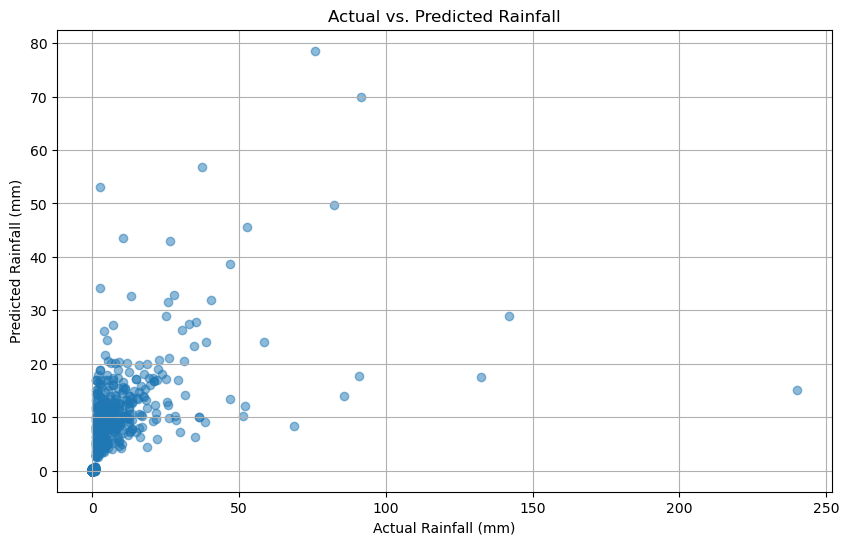

In [62]:
import matplotlib.pyplot as plt

# Create a scatter plot to visualize actual vs. predicted rainfall
plt.figure(figsize=(10, 6))
plt.scatter(y_rainfall_test, y_rainfall_pred, alpha=0.5)
plt.title('Actual vs. Predicted Rainfall')
plt.xlabel('Actual Rainfall (mm)')
plt.ylabel('Predicted Rainfall (mm)')
plt.grid(True)
plt.show()
